### SEGUNDO INFORME DE ASTROMETRIA

Baracchi, Marcos.
Gmail: marcos.baracchi@mi.unc.edu.ar

#### **1_Introducción**

En este trabajo se desarrollo el metodo de la tranformacion inversa para obtener una muestra de datos generada aleatoriamente que sigua una determinada dsitribucion de probabilidad. Tambien se realizaron el Experimento de Buffon para determinar el valor de $ \pi $ , el Remuestreo Bootstrap para asignarle el error a un estadistico y el Test de chi–cuadrado para ver cuando podemos distinguir de que distribucion proviene una muestra.

#### **2_Datos y Resultados** 

#### **2.1_ Ejercicio 3:** Distribución de Fisher-Tippett

La distibucion de Fisher-Tippett o tambien conocida como distribucion de valor extremo generalizado (GEV), tiene la siguiente forma funcional  $ \large \frac{1}{\sigma} \, t (x) ^ {\xi + 1} e ^ {- t (x)}  $ donde si  $ \xi = 0 $ nos queda la funcion $ \large t(x) = e ^ {-\frac{x-\mu}{\sigma}} $ en nuestro caso vamos a tomar $ \mu=0 $ y $ \lambda =1/\sigma = 1 $. (1)

In [1]:
import numpy as np

In [2]:
def t(x,l = 1): # defino t
    t = np.exp(-x*l)
    return (t)   

In [3]:
def pdf(x,l = 1): #defino la distribucion 
    p = l*t(x)*np.exp(-t(x))
    return (p)

In [4]:
def cdf(x, l = 1): # defino la inversa
    P = np.exp(-t(x,l = 1))
    return(P)

In [5]:
def invcdf(y,l = 1): # defino la inversa de la acumulada
    f = -(1/l)*np.log(-np.log(y))
    return(f)

Ahora, a la funcion inversa le aplico el degenerador de numeros aleatorios con distribucion uniforme y obtengo como resultado los valores que siguen la distribucion de Fisher-Tippett

In [6]:
import matplotlib.pyplot as plt

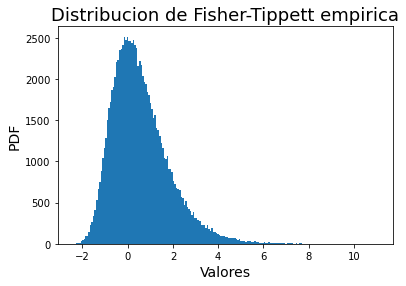

In [7]:
y = np.random.random(100000)
g = invcdf(y)
plt.hist(g, bins='auto')
plt.title('Distribucion de Fisher-Tippett empirica',fontsize = 18)
plt.xlabel('Valores',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.show()

Luego, podemos comparar el valor medio de la muestra que obtuvimos con el teorico E($\lambda$)

In [8]:
def E(l=1):
    j = 0.57721/l
    return(j)

In [9]:
k = np.mean(g)-E()
print(k)

-0.004614016621986461


En donde vemos que la diferencia tiende a cero por lo que los resultados obtenidos con este metodo son buenos.

#### **2.2_ Ejercicio 4:** Metodo de la transformada inversa: distribucion de Poisson

En este ejecicio lo que hicimos fue simular la entrada de clientes a una tienda como un proceso de Poisson de tasa λ = 5/h, hasta un tiempo T=3 h.

In [10]:
def pdf(t,l = 5): # el t seria el tiempo y el l el lambda (districucion de probablilidades)
    f = l*np.exp(-l*t)
    return(f)
def cdf(t,l = 5):
    F = -np.exp(-l*t) + 1
    return(F)
def invcdf(y,l = 5):
    t = -np.log(1-y)/l 
    return(t)

Ahora, a la funcion inversa le aplico el degenerador de numeros aleatorios con distribucion uniforme y obtengo como resultado la forma funcional de la probablididad de que ingrese un nuevo cliente en funcion del tiempo. Si luego realizo la suma acumulada de estos valores en funcion del ttiempo obtengo el siguiente grafico:

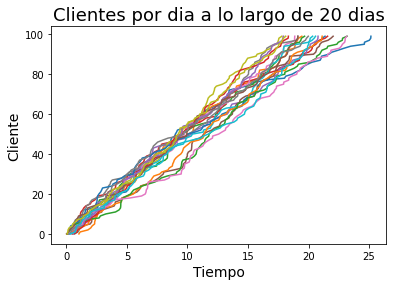

In [11]:
for i in range(20):
    y = np.random.random(100)
    t = invcdf(y)
    plt.plot(np.cumsum(t),np.arange(100))
plt.title('Clientes por dia a lo largo de 20 dias',fontsize = 18)
plt.xlabel('Tiempo',fontsize = 14)
plt.ylabel('Cliente',fontsize = 14)
plt.show()

#### **2.3_ Ejercicio 7:** Experimento de Buffon

Aca se realizo el experimento de Buffon para obtener un valor aproximado de $\pi$, este experimento consiste en tirar una determinada cantidad de agujas sobre una mesa y ver si estas mismas tocan las lineas dibujadas en las misma.

##### **A) Escriba la funcion densidad de probabilidad de que la aguja caiga con parametros (x,θ)**

Todos los valores tanto de x como de θ son igualmente problables por los q su pdf es una cte, luego integrando en el intervalo de valores posibles podemos despejar el valor de esa constante 

$$ \int_{0}^{t/2} p(x) dx = 1 \;\int_{0}^{\pi/2} p(\theta) d\theta = 1 $$

De donde podemos obtenes que $ p(x)= 2/t \: y \: p(\theta)= 2/\pi $, con lo que la probabilidad conjunta $ p(x,\theta) = 4/t\pi $.

##### **B) ¿Cual es la probabilidad de que la aguja toque una raya?**

Para que la aguja toque la linea se debe cumplir que $ l/2\sin(\theta) \geq x $, por lo que la probabilidad de que esto ocurra es: 

$$  \int _{0}^{\pi/2} \int _{0}^{l/2\sin(\theta)} p(x,\theta) dx  d\theta = 2l/t\pi $$

##### **C) Simulacion del experimento**

In [12]:
t = 10 #distancia entre las lineas
l = 5 # tamaño de las agujas
n = 500000
x = np.random.random(n)*t/2
theta = np.random.random(n)*np.pi/2
h = []
for i in range(n):
    if (l/2)*np.sin(theta[i]) >= x[i]:
        h.append(1)
pi = 2*l/(t*len(h)/n)
print(pi)

3.138554632820494


Luego, vemos que el resultado obtenido con el experimento se aproxima bastante al valor teorico de $\pi$

#### **2.4_ Ejercicio 8:** Remuestreo Bootstrap

En este ejercicio se trabajp sobre una distribucion normal al cual se le calculo su variancia y luego mediante el remuestreo Bootstrap se le determino su intervalo de confianza

Donde la varianza de la muestra es: 7.530804777802858e-05


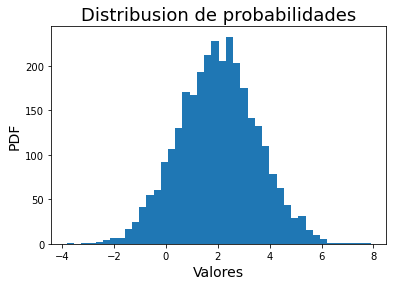

In [13]:
n = 3000 #muestra de 3000 datos que siguen una distribucion normal con un dado sigma y una media
sigma = 1.5
mean = 2
muestra= np.random.normal(loc = mean,scale = sigma,size= n)
mean = np.mean(muestra)
h = []
for i in range(n):# el estadistico de prueba es la varianza 
    t = (muestra[i]-mean)**2
    h.append(t)
s = np.sqrt((np.cumsum(h[i]))/n)
print('Donde la varianza de la muestra es:',s[0])
plt.hist(muestra,bins='auto')
plt.title('Distribusion de probabilidades',fontsize = 18)
plt.xlabel('Valores',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.show()

Ahora, defino mi funcion bootstrap la cual va a crear 1000 nuevos remuestreos y a cada uno de estos le va a calcular su varianza

In [14]:
def bootstrap(x,func,m = 1000): # esto me va a crear 1000 remuestreos en base a nuestra muestra
    y = np.zeros(m)
    for i in range(m):
        _x= np.random.choice(x,size=len(x)) # esto es un remuestreo de x
        y[i] = func(_x)
    return(y)

Ahora, podemos ver la distibucion de estas varianzas 

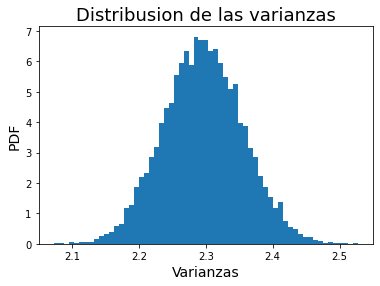

In [15]:
boot = bootstrap(muestra,np.var,m = 10000)
plt.hist(boot,bins='auto',density = True)
plt.title('Distribusion de las varianzas',fontsize = 18)
plt.xlabel('Varianzas',fontsize = 14)
plt.ylabel('PDF',fontsize = 14)
plt.show()

Y ahora usando la funcion "quantile" podemos calcular el intervalo de confianza de esta distribucion, en la cual se tomo un nivel de significancia de $\alpha = 0.05$

In [16]:
h=np.quantile(boot,[0.025,0.975])
print('En donde el intervalo de confianza es IC=',h)

En donde el intervalo de confianza es IC= [2.18237279 2.4133857 ]


#### **2.5_ Ejercicio 9:** Test de chi–cuadrado

El método Chi-cuadrado, es considerado como una prueba no paramétrica que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida existen diferencias entre ambas, por medio de una prueba de hipótesis PH.

##### **A) Simule 100 observaciones de la V.A. binomial y calcule las frecuencias de cada valor.**

In [17]:
import scipy.stats as st

In [18]:
def muestra_bi():
    y=[]
    for i in range(100):        
        x=st.binom.rvs(10, 0.4) 
        y.append(x)         
    return(y) 

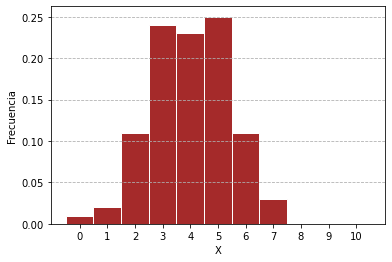

Donde la frecuencia de los valores es: [0.01 0.02 0.11 0.24 0.23 0.25 0.11 0.03 0.   0.   0.  ]


In [19]:
datos = muestra_bi()
h = plt.hist(datos, bins=np.arange(-0.5, 11.5, 1), color='brown',edgecolor='white',density = True)
plt.xlabel("X");plt.ylabel('Frecuencia')
plt.xticks(range(0,11,1))
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.show()
print('Donde la frecuencia de los valores es:',h[0])

##### **B) Calcule el estadistico χ2 a partir del modelo y de los datos simulados.**

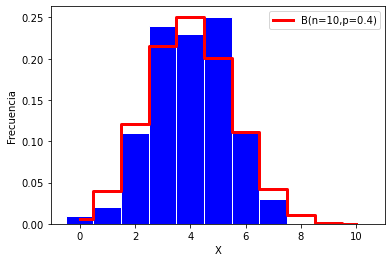

In [20]:
n = 10
p =0.4
x = np.arange(11)
y = st.binom(n,p).pmf(x)
plt.step(x,y,where = 'mid',lw=3,c='r',label=f"B(n={n},p={p:.1f})")
plt.hist(datos, bins=np.arange(-0.5, 11.5, 1), color='blue',edgecolor='white',density = True)
plt.legend()
plt.xlabel("X");plt.ylabel("Frecuencia")
plt.show()

In [21]:
chi2 = 0
for i in range(10):# el estadistico de prueba es la varianza 
    chi2 = chi2+(((h[0][i]-y[i])**2)/y[i])
print('El chi-cuadrado es:',chi2)    

El chi-cuadrado es: 0.04644716652549742


##### **C) Realice una prueba de hipotesis completa para decidir si los datos estan en acuerdo con el modelo.**

Hipótesis
Hipótesis nula $ H_{0} = $  La muestra de la distribución empírica sigue la distribución Binomial teórica

Hipótesis alternativa $ H_{1} = $ La muestra de la distribución empírica no sigue la distribución Binomial teórica

Zona de aceptación: $ \large \chi^2 < \chi^2_{(1-\alpha);gl} $

Zona de rechazo:  $ \large \chi^2 > \chi^2_{(1-\alpha);gl} $

donde tomamos $ \alpha = 0.05 $ y los grados de libertad son $ gl = 10 $, con lo que nos queda un chi de comparacion $ \large \chi^2_{(0.95);10}\small =18.3 $ (2)

Luego, tenemos que nuestro $ \large \chi^2 \small = 0.015 $ por lo que nuestro chi-cuadrado cae dentro de la zona de aceptacion con lo cual no podemos rechazar la hipotesis nula $ H_{0} $.

##### **D) Calcule el valor-p de la prueba.**

El valor-p se puede calcular de la siguiente forma: $$ p-value = P(\chi^2 > \chi^2_{0}|H_{0}) = 1 - P(\chi^2 < \chi^2_{0}) = 1 - F(\chi^2_{0}) $$

donde $ \chi^2 $ la variable aleatoria estadístico chi-cuadrado y $ \chi^2_{0} $ el valor calculado, P la función probabilidad de la distribución del estadístico de prueba y F la función acumulada.

In [22]:
f=st.chi2.cdf(chi2,10) #donde chi2 es el valor que obtubimos para el chi-cuadrado y 10 son los grados de libertad
p=1-f
print(p)

0.9999999999447843


Luego, este valor de p es mucho mayor que 0.05 por lo cual nuevamente no puedo rechazar mi hipotesis nula.

##### **E) Simule muestras de 100 observaciones de una V.A. N(μ, σ), con σ=2.5 y μ que varie entre 2 y 7. Estudie como varia el valor-p y determine si en algun rango de μ se puede “confundir” el modelo.**

In [23]:
def muestra_normal(mean,sigma=2.5,n=100):
    y=[]
    for i in range(n):     
        x=st.norm.rvs(loc=mean , scale= sigma) 
        y.append(x)     
    return(y)

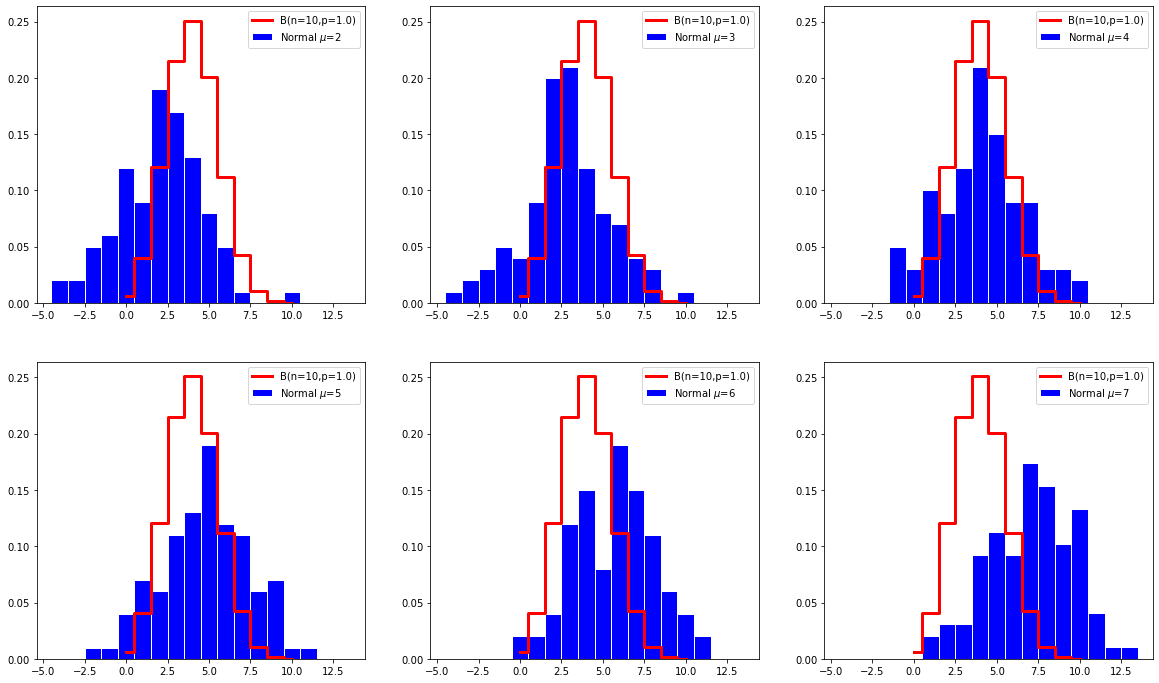

In [24]:
d = []
plt.figure(figsize = (20,12))
for i in [2,3,4,5,6,7]:
    plt.subplot(2,3,i-1)
    j = plt.hist(muestra_normal(i),bins=np.arange(-4.5,14.5,1), color='blue',edgecolor='white',density = True,label='Normal $ \mu $='+str(i))
    plt.step(x,y,where = 'mid',lw=3,c='r',label=f"B(n={n},p={p:.1f})")
    plt.legend(loc='best')
    d.append(j)


In [25]:
for l in range(6):
    chi2 = 0
    for i in range(11):# el estadistico de prueba es la varianza 
        chi2 = chi2+(((d[l][0][i+5]-y[i])**2)/y[i])
        f=st.chi2.cdf(chi2,10)
        p=1-f
    print('El chi2 de la distribucion normal con media ='+str(l+2),'es:',chi2,'y el p es:',p)

El chi2 de la distribucion normal con media =2 es: 2.195168856156398 y el p es: 0.9946136023904862
El chi2 de la distribucion normal con media =3 es: 2.2125879902792986 y el p es: 0.9944358339228944
El chi2 de la distribucion normal con media =4 es: 1.8597933101533857 y el p es: 0.9973061359032255
El chi2 de la distribucion normal con media =5 es: 2.086128475340849 y el p es: 0.9956363933317878
El chi2 de la distribucion normal con media =6 es: 5.232793603998893 y el p es: 0.8750944177084161
El chi2 de la distribucion normal con media =7 es: 28.150241644246133 y el p es: 0.0017079000150006518


Con lo cual, comparando los valores obtenidos para p con $\alpha$ podemos rechazar la hipotesis nula de los dos ultimos casos, ya que estos valores de p son menores al valor de $\alpha$ seleccionado

##### **F) Simule una muestra de 10000 realizaciones de una V.A. con f(x) ∼ B(n = 1000, p = 0.4) y repita el punto anterior.**

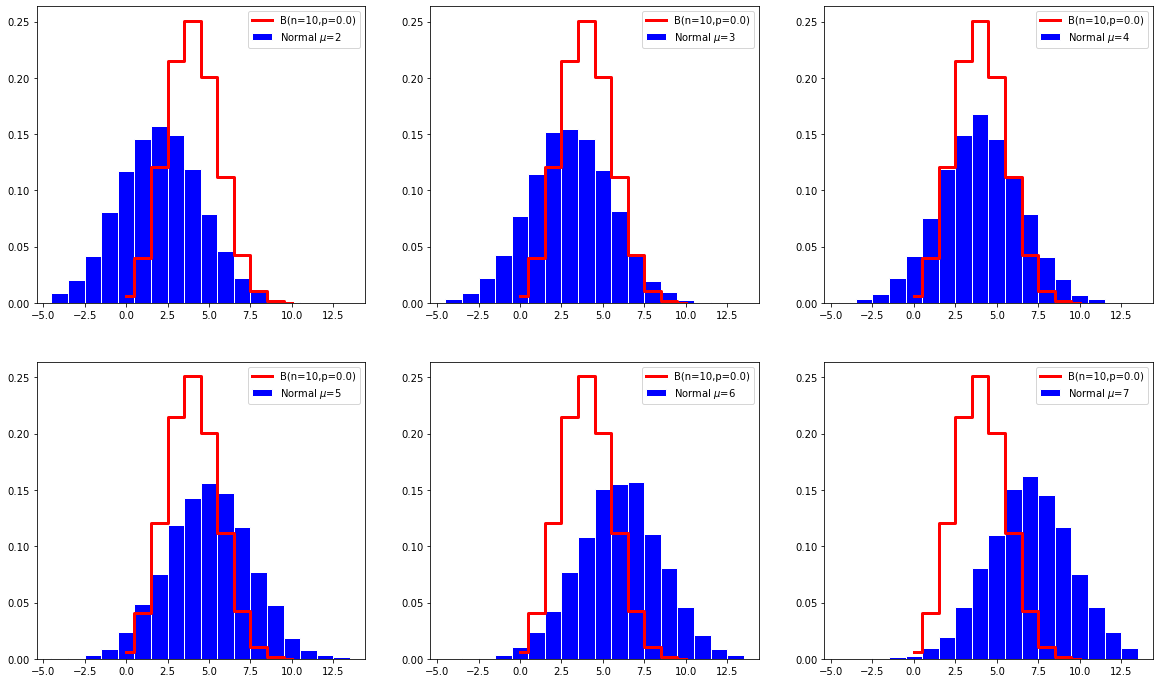

In [26]:
d = []
plt.figure(figsize = (20,12))

for i in [2,3,4,5,6,7]:
    plt.subplot(2,3,i-1)
    j = plt.hist(muestra_normal(i,n=10000),bins=np.arange(-4.5,14.5,1), color='blue',edgecolor='white',density = True,label='Normal $ \mu $='+str(i))
    plt.step(x,y,where = 'mid',lw=3,c='r',label=f"B(n={n},p={p:.1f})")
    #plt.hist(y, bins=10,density = True,histtype = 'step',color = 'red', lw =3)
    plt.legend(loc='best')
    d.append(j)

In [27]:
for l in range(6):
    chi2 = 0
    for i in range(11):# el estadistico de prueba es la varianza 
        chi2 = chi2+(((d[l][0][i+5]-y[i])**2)/y[i])
        f=st.chi2.cdf(chi2,10)
        p=1-f
    print('El chi2 de la distribucion normal con media ='+str(l+2),'es:',chi2,'y el p es:',p)

El chi2 de la distribucion normal con media =2 es: 3.9316684521410745 y el p es: 0.9503768852934615
El chi2 de la distribucion normal con media =3 es: 2.4999327362959662 y el p es: 0.9908767009381051
El chi2 de la distribucion normal con media =4 es: 1.184577881322461 y el p es: 0.9996278718089301
El chi2 de la distribucion normal con media =5 es: 1.3680351498081098 y el p es: 0.9992909201481437
El chi2 de la distribucion normal con media =6 es: 6.1791080750955985 y el p es: 0.7999975097410652
El chi2 de la distribucion normal con media =7 es: 25.483920069162096 y el p es: 0.004499934091625635


Con lo cual, comparando los valores obtenidos para p con $\alpha$ podemos rechazar la hipotesis nula del ultimo caso, ya que estos valores de p son menores al valor de $\alpha$ seleccionado.

#### **3_ Conclusión**   

En Conclusion, podemos ver como crear una muestra de datos que sigan una determinada distribucion utilizando el metodo de la tranformacion inversa, luego como podemos obtener determinados parametros apartir del uso de valiables aleatorias mediante el metodo Monte Carlo como lo hicimos en el experimento de Buffon. Luego, como asignarle un determinado intervalo de confianza a un dado estadistico mediante el remuestreo de Bootstranp y por ultimo como determinar si una dada muestra proviene de una dada distribucion mediante el test de chi-cuadrado.

#### **4_ Bibliografía**  

[1] Hmong; link: https://hmong.es/wiki/Generalized_extreme_value_distribution

[2] Studocu; link: https://www.studocu.com/ec/document/universidad-tecnica-de-cotopaxi/estadistica/tabla-chi-cuadrado/11975867